# Exploration and Visualization

In [166]:
import pandas as pd
pd.set_option('display.max_columns', None)

import _pickle as pickle
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the DF

In [167]:
with open('clean_df.pkl', 'rb') as fp:
    df = pickle.load(fp)

In [168]:
df

,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Depth,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Daylight,Month,CULEX ERRATICUS,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS
0,T002,41.954690,-87.800991,1,0,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,0.0,0.0,0.000,29.415,30.100,5.80,17.0,6.95,14.96,5.0,0,0,1,0,0,0,0
1,T002,41.954690,-87.800991,1,0,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,0.0,0.0,0.000,29.415,30.100,5.80,17.0,6.95,14.96,5.0,0,0,0,1,0,0,0
2,T007,41.994991,-87.769279,1,0,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,0.0,0.0,0.000,29.415,30.100,5.80,17.0,6.95,14.96,5.0,0,0,0,1,0,0,0
3,T015,41.974089,-87.824812,1,0,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,0.0,0.0,0.000,29.415,30.100,5.80,17.0,6.95,14.96,5.0,0,0,1,0,0,0,0
4,T015,41.974089,-87.824812,4,0,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,0.0,0.0,0.000,29.415,30.100,5.80,17.0,6.95,14.96,5.0,0,0,0,1,0,0,0
5,T045,41.921600,-87.666455,2,0,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,0.0,0.0,0.000,29.415,30.100,5.80,17.0,6.95,14.96,5.0,0,0,0,1,0,0,0
6,T046,41.891118,-87.654491,1,0,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,0.0,0.0,0.000,29.415,30.100,5.80,17.0,6.95,14.96,5.0,0,0,0,1,0,0,0
7,T048,41.867108,-87.654224,1,0,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,0.0,0.0,0.000,29.415,30.100,5.80,17.0,6.95,14.96,5.0,0,0,1,0,0,0,0
8,T048,41.867108,-87.654224,2,0,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,0.0,0.0,0.000,29.415,30.100,5.80,17.0,6.95,14.96,5.0,0,0,0,1,0,0,0
9,T049,41.896282,-87.655232,1,0,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,0.0,0.0,0.000,29.415,30.100,5.80,17.0,6.95,14.96,5.0,0,0,0,1,0,0,0


## Correlation
Checking if any features are correlated to __WnvPresent__

#### Function to Visualize Correlation

In [5]:
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)

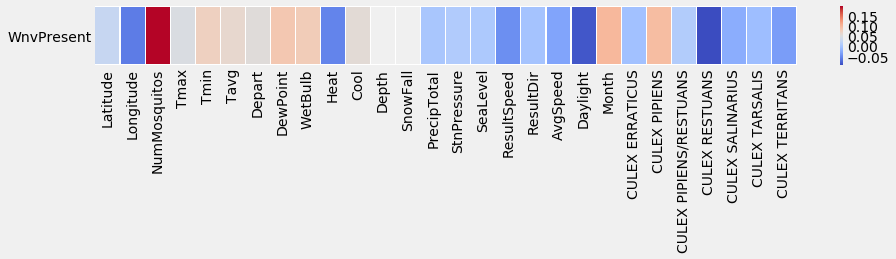

In [33]:
# Correlation Matrix
corr = df.corr().drop('WnvPresent', axis=1)

# Selecting only 'WnvPresent' to get its correlations with the other features
corr = corr.iloc[[corr.index.get_loc('WnvPresent')], :]

# Plotting the Correlation DF as a heatmap
plt.style.use('fivethirtyeight')

plt.figure(figsize=(14,1))
sns.heatmap(corr, annot=False, linewidths=.1, cmap="coolwarm")
plt.yticks(rotation=0)
plt.show()

## Class Balance Count

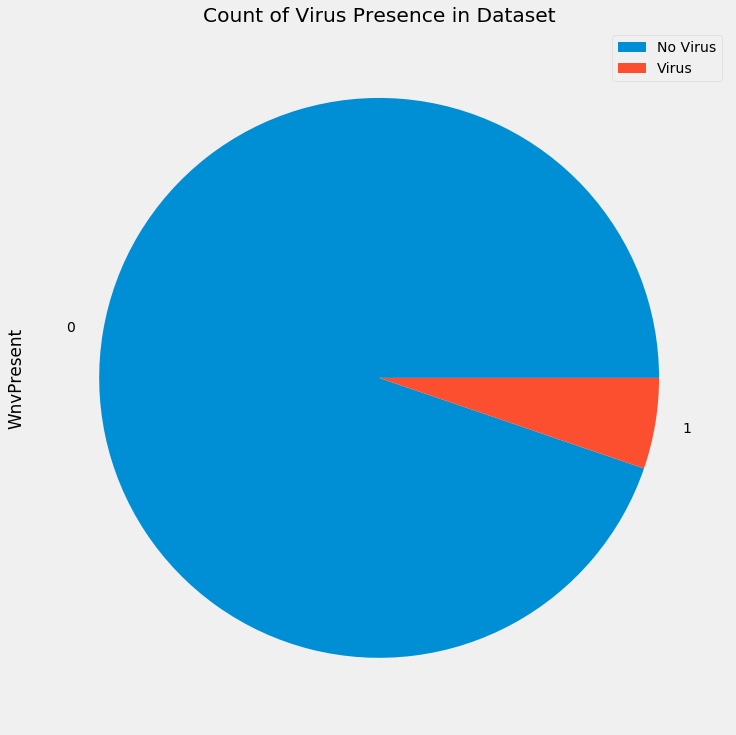

In [101]:
df.WnvPresent.value_counts().plot('pie', figsize=(12,12), 
                                  title='Count of Virus Presence in Dataset',
                                  legend=True).legend(['No Virus', 'Virus'])
plt.show()

### Count of Virus Presence among Species

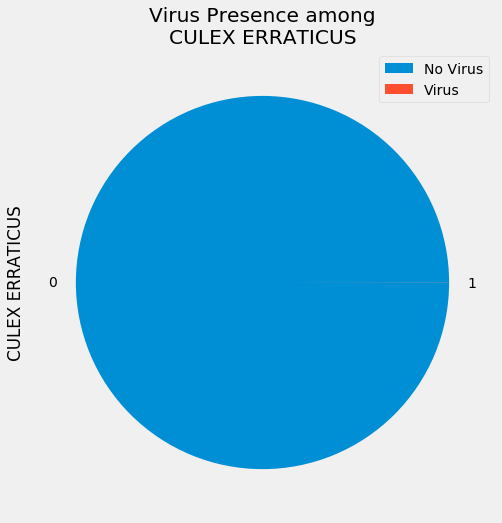

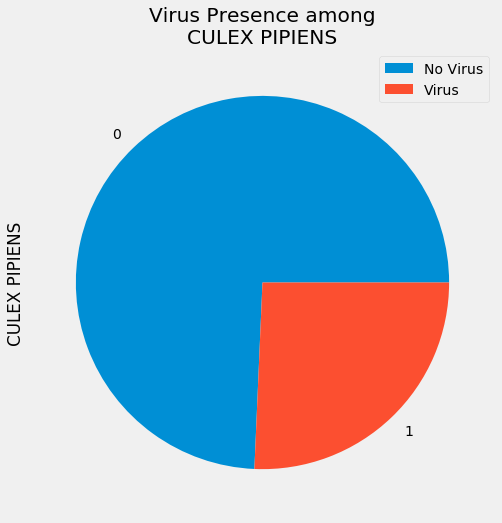

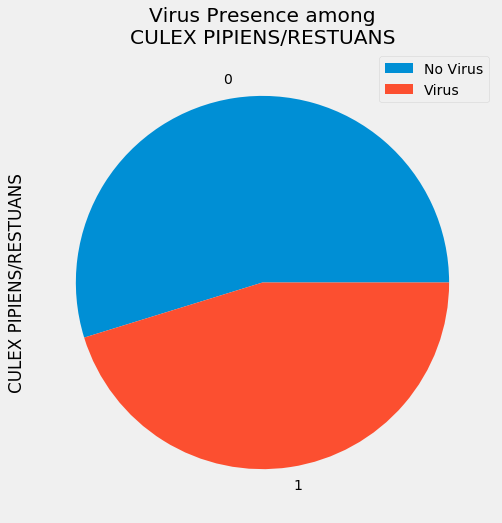

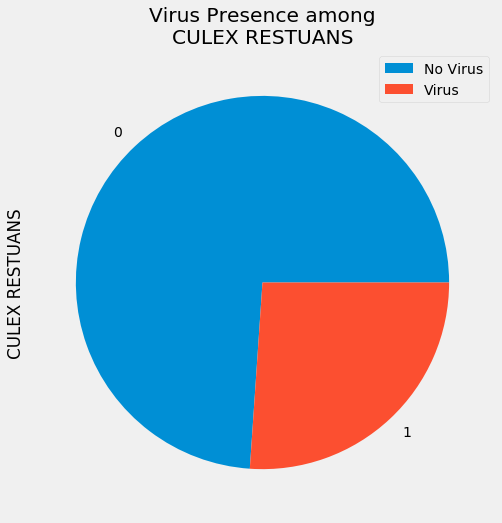

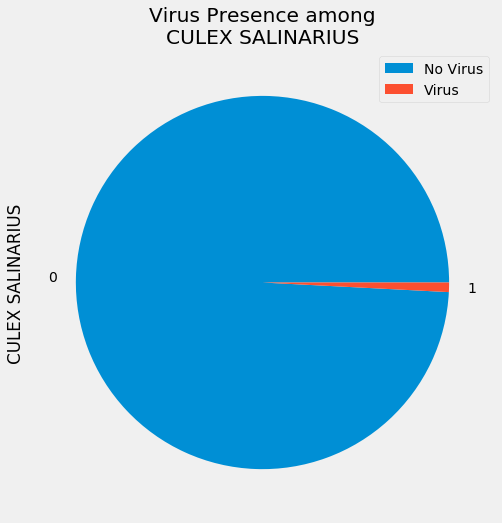

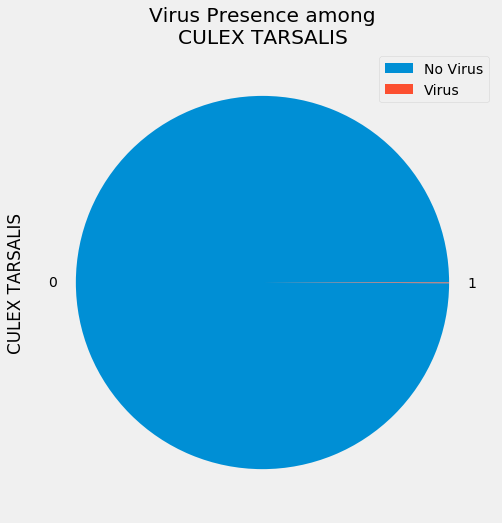

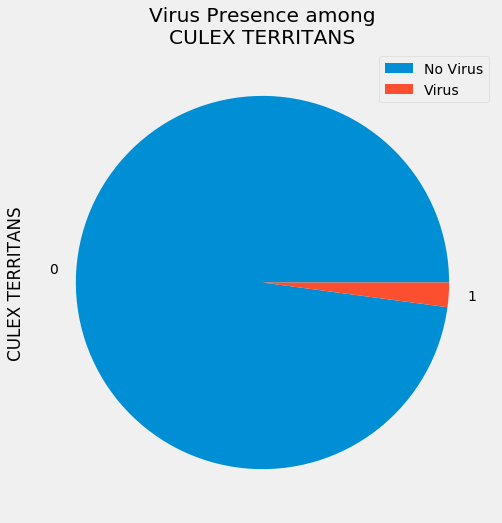

In [83]:
species = df.iloc[:, -7:]

for i in species.columns:
    
    # Counting and plotting the presence of the virus amongst the species
    species[i].value_counts().plot('pie',
                                   figsize=(8,8),
                                   title='Virus Presence among\n' + i,
                                   legend=True).legend(['No Virus', 'Virus'])
    plt.show()

### Number of Mosquitoes infected with the Virus for each Species

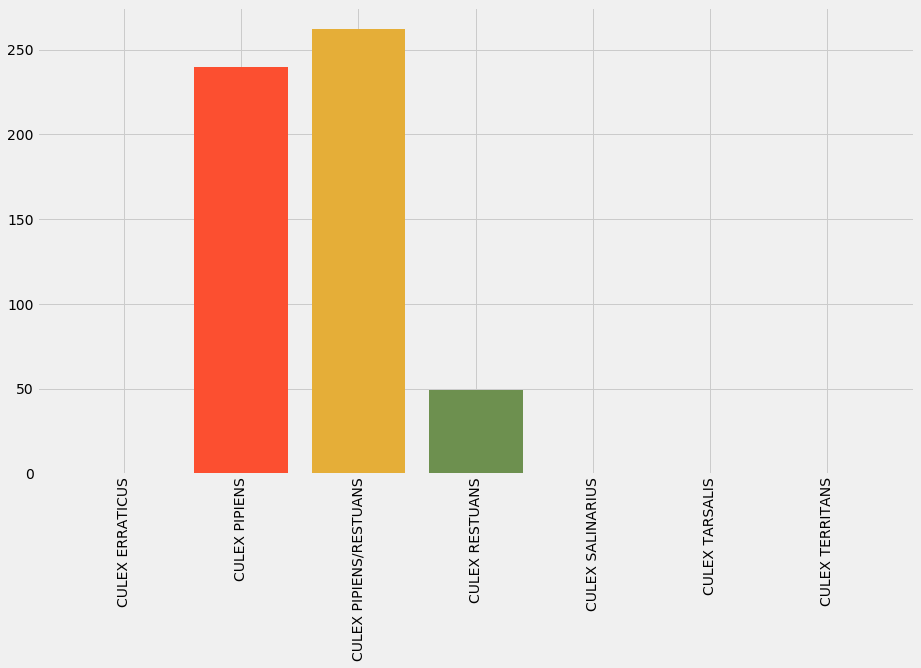

In [170]:
infected = df[df.WnvPresent==1].iloc[:, -7:]

plt.figure(figsize=(14,8))

for i in infected.columns:
    plt.bar(i, infected[infected[i]==1].shape[0])
    plt.xticks(rotation=90)

### Monthly Distribution

<Figure size 1008x576 with 0 Axes>

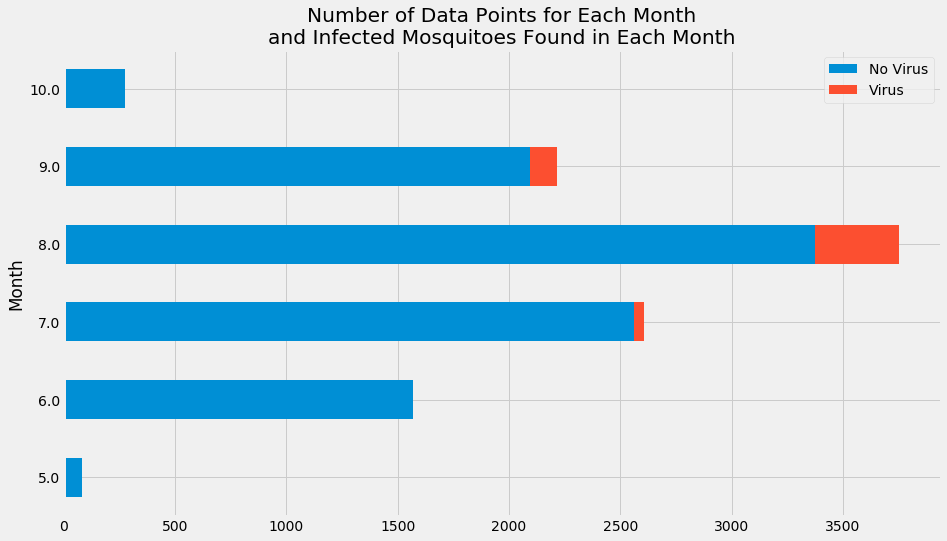

In [165]:
plt.figure(figsize=(14,8))

df.groupby('Month').WnvPresent.value_counts().unstack().fillna(0).plot.barh(stacked=True, 
                                                                            legend=True,
                                                                            figsize=(14,8)).legend(['No Virus', 'Virus'])

plt.title("Number of Data Points for Each Month\nand Infected Mosquitoes Found in Each Month")
plt.show()